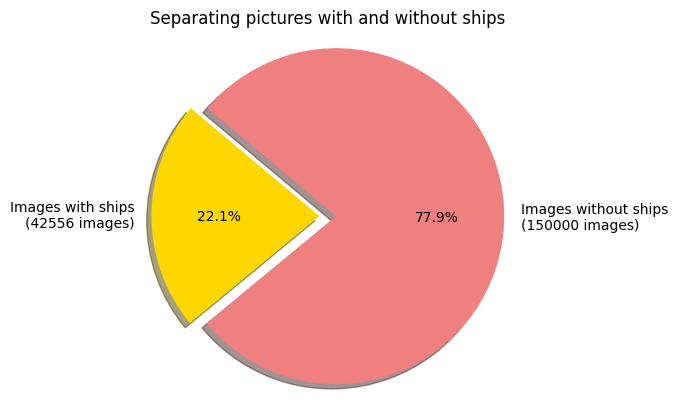

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:\\Users\\Микола\\Downloads\\airbus-ship-detection\\train_ship_segmentations_v2.csv"
df = pd.read_csv(file_path)

images_with_ships = df[df['EncodedPixels'].notnull()]['ImageId'].nunique()
images_without_ships = df[df['EncodedPixels'].isnull()]['ImageId'].nunique()

labels = [f'Images with ships\n({images_with_ships} images)', f'Images without ships\n({images_without_ships} images)']
sizes = [images_with_ships, images_without_ships]
colors = ['gold', 'lightcoral']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title("Separating pictures with and without ships")
plt.show()

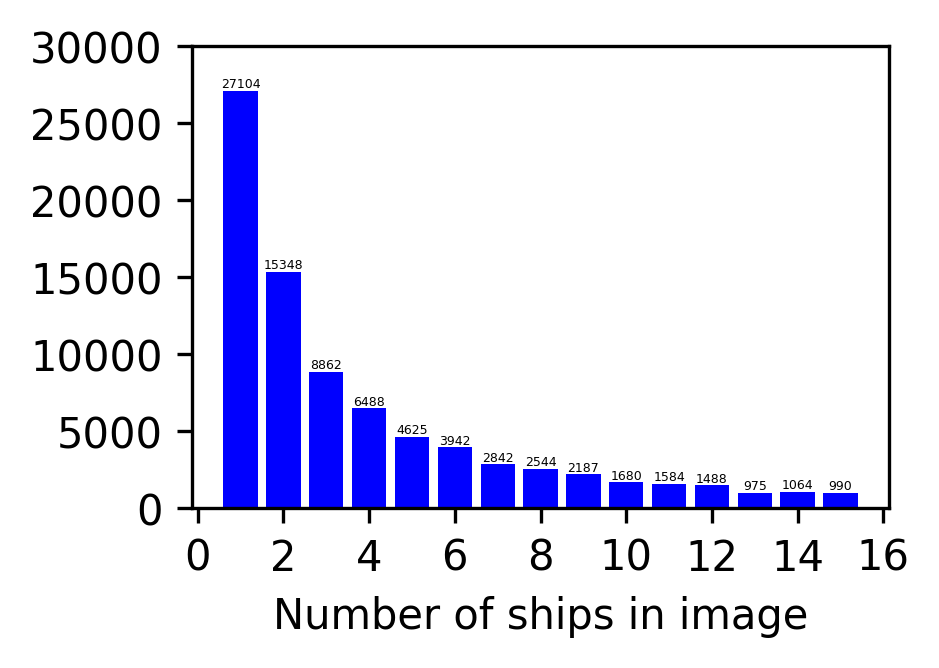

In [20]:

df['Num_Ships'] = df.groupby('ImageId')['EncodedPixels'].transform(lambda x: x.count() if x.notnull().any() else 0)
df = df[df['Num_Ships'] > 0]
ship_counts = df.groupby('Num_Ships').size()

plt.figure(figsize=(3, 2), dpi=300)
plt.bar(ship_counts.index, ship_counts.values, color='blue')
plt.xlabel('Number of ships in image')
plt.xticks(range(0, 17, 2))

plt.yticks(range(0, 30001, 5000))  

for i, v in enumerate(ship_counts.values):
    plt.text(i + 1, v + 0.1, str(v), ha='center', va='bottom', fontsize=3)

plt.show()

In [ ]:
Also i am found 1 corupted image